<a href="https://colab.research.google.com/github/aaakash06/PRODIGY_ML_3/blob/main/svm_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import zipfile
import os

def unzip_folder(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
        zip_ref.close()

# Example usage
zip_file_path = '/content/Dhwaj-Sharma PRODIGY_ML_03 main Dataset.zip'
extract_to_path = '/content/dataset'

# Ensure the extraction path exists
os.makedirs(extract_to_path, exist_ok=True)

unzip_folder(zip_file_path, extract_to_path)

In [3]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir('/content/dataset')

There are 2 directories and 0 images in '/content/dataset'.
There are 0 directories and 4001 images in '/content/dataset/Cat'.
There are 0 directories and 4006 images in '/content/dataset/Dog'.


In [5]:
def not_image(dir_path):
  for filename in os.listdir(dir_path):
    if "jpg" not in filename:
        print(f"The file that is not image is {filename}")

not_image('/content/dataset/Cat')
not_image('/content/dataset/Dog')

The file that is not image is _DS_Store
The file that is not image is _DS_Store


In [6]:
os.remove("/content/dataset/Cat/_DS_Store")
os.remove("/content/dataset/Dog/_DS_Store")

In [7]:
walk_through_dir('/content/dataset')

There are 2 directories and 0 images in '/content/dataset'.
There are 0 directories and 4000 images in '/content/dataset/Cat'.
There are 0 directories and 4005 images in '/content/dataset/Dog'.


In [19]:
import cv2

data = []

for filename in os.listdir('/content/dataset/Cat'):
  img = cv2.imread(f'/content/dataset/Cat/{filename}',0)
  try:
    img = cv2.resize(img,(50,50))
  except:
    pass

  img = np.array(img)
  img = img/255
  img = img.flatten()
  data.append((img,0))

for filename in os.listdir('/content/dataset/Dog'):
  img = cv2.imread(f'/content/dataset/Dog/{filename}',0)
  try:
    img = cv2.resize(img,(50,50))
  except:
    pass
  img = np.array(img)
  img = img/255
  img = img.flatten()
  data.append((img,1))


In [20]:
import random
random.shuffle(data)



In [21]:
data[5]

(array([0.91764706, 0.92941176, 0.91764706, ..., 0.18431373, 0.20784314,
        0.96862745]),
 0)

In [22]:
data[6]

(array([0.41176471, 0.24705882, 0.32941176, ..., 0.43529412, 0.47843137,
        0.29411765]),
 1)

In [23]:
data[0][0]

array([0.4       , 0.34901961, 0.11764706, ..., 0.28627451, 0.35294118,
       0.28235294])

In [24]:
data[0][0].shape

(2500,)

In [25]:
for d in data:
  if d[0].shape != (2500,):
    print(d[0].shape)

In [26]:
import pickle

with open('data.pickle','wb') as f:
  pickle.dump(data,f)

In [27]:
X = []
y = []

for img,label in data:
  X.append(img)
  y.append(label)

In [29]:
X[:5]

[array([0.4       , 0.34901961, 0.11764706, ..., 0.28627451, 0.35294118,
        0.28235294]),
 array([0.34117647, 0.34117647, 0.39607843, ..., 0.63529412, 0.58823529,
        0.72941176]),
 array([0.42745098, 0.48627451, 0.2627451 , ..., 0.45882353, 0.49411765,
        0.43137255]),
 array([0.51764706, 0.59215686, 0.43921569, ..., 0.31372549, 0.40784314,
        0.46666667]),
 array([0.2       , 0.20392157, 0.21568627, ..., 0.71764706, 0.69803922,
        0.70980392])]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(len(X_train))
print(len(X_test))

6404
1601


In [32]:
print(len(y_train))
print(len(y_test))

6404
1601


In [33]:
from sklearn.svm import SVC

model = SVC(C=1, kernel='poly', gamma="auto")
model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [36]:
prediction = model.predict(X_test)

In [37]:
accuracy = model.score(X_test,y_test)
print('Accuracy :', accuracy)

Accuracy : 0.5627732667083073


In [39]:
categ = ['Cat','Dog']
np.random.seed(42)

def predict_image():
    idx = np.random.randint(0,len(X_test))
    mypet = X_test[idx].reshape(50,50)*255
    print('Prediction is', categ[prediction[idx]])
    plt.imshow(mypet, cmap ='gray')
    plt.title('Prediction is '+categ[prediction[idx]])
    plt.show()

Prediction is Cat


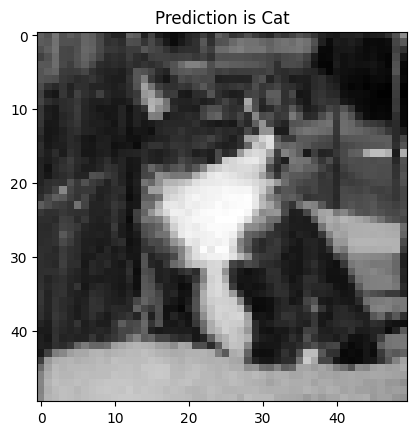

In [40]:
predict_image()

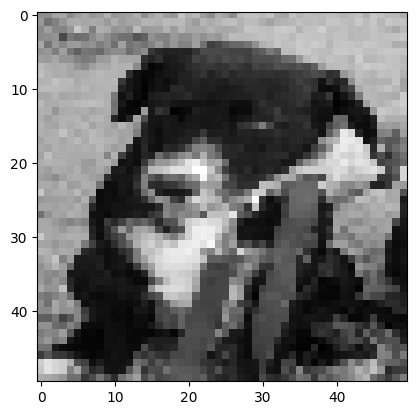

In [45]:
image = X_test[0]*255
image = image.reshape(50,50)
plt.imshow(image, cmap ='gray')
plt.show()

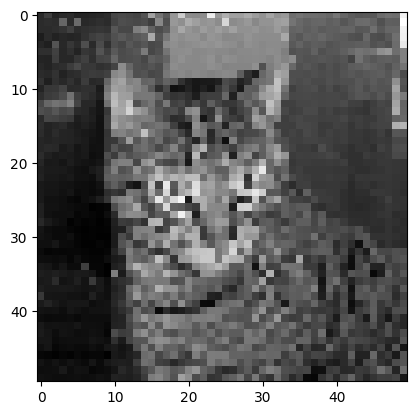

In [55]:
path = "/content/dataset/Cat/cat.1.jpg"
i = cv2.imread(path,0)
i = cv2.resize(i,(50,50))
plt.imshow(i, cmap ='gray')
plt.show()